In [26]:
#Models, simulation, and degrees of belief

from probmods import *

In [27]:
#Building Generative Models

print(flip())

print(repeat(10, flip))

print(flip() + flip() + flip())

def sum_flips():
    return flip() + flip() + flip()


def noisy_double(x):
    return x+x if flip() else x


print(repeat(100, sum_flips))


print(noisy_double(3))

True
[True, False, False, False, False, True, True, True, False, True]
1
[2, 3, 1, 2, 2, 3, 2, 0, 1, 0, 1, 1, 2, 2, 2, 3, 2, 1, 3, 2, 1, 0, 1, 1, 3, 1, 3, 3, 0, 3, 2, 2, 2, 2, 1, 2, 3, 2, 2, 1, 1, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 0, 0, 2, 1, 2, 3, 3, 1, 1, 3, 1, 0, 1, 2, 2, 1, 3, 3, 1, 0, 1, 0, 3, 1, 2, 3, 1, 2, 3, 1, 1, 3, 1, 1, 1, 3, 2, 2, 0, 1, 1, 2, 1]
6


In [28]:
#Example: Flipping Coins

def fair_coin():
    return 'h' if flip(0.5) else 't'


print(repeat(20, fair_coin))


def trick_coin():
    return 'h' if flip(0.95) else 't'


print(repeat(20, trick_coin))


def make_coin(weight):
    return lambda: 'h' if flip(weight) else 't'


fairCoin = make_coin(0.5)
trickCoin = make_coin(0.95)
bentCoin = make_coin(0.25)

print(repeat(20, fairCoin))
print(repeat(20, trickCoin))
print(repeat(20, bentCoin))


def bend(coin):
    return lambda: make_coin(0.7)() if coin() == 'h' else make_coin(0.1)()


fairCoin = make_coin(0.5)
bentCoin = bend(fairCoin)
print(repeat(10, bentCoin))

['t', 'h', 'h', 't', 'h', 'h', 't', 't', 't', 'h', 'h', 't', 'h', 't', 'h', 'h', 'h', 'h', 't', 't']
['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h']
['h', 't', 't', 'h', 't', 't', 't', 'h', 'h', 't', 't', 'h', 'h', 'h', 't', 't', 'h', 't', 't', 'h']
['h', 'h', 't', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h']
['h', 't', 't', 't', 't', 't', 't', 't', 'h', 't', 'h', 'h', 't', 't', 't', 'h', 't', 't', 't', 't']
['h', 'h', 'h', 't', 't', 't', 'h', 'h', 't', 'h']


In [29]:
#Example: Causal Models in Medical Diagnosis

lungCancer = flip(0.01)
cold = flip(0.2)
cough = cold | lungCancer
print(cough)

# More complex:
lungCancer = flip(0.01)
TB = flip(0.005)
stomachFlu = flip(0.1)
cold = flip(0.2)
other = flip(0.1)

cough = (
    (cold & flip(0.5)) |
    (lungCancer & flip(0.3)) |
    (TB & flip(0.7)) |
    (other & flip(0.01)))

fever = (
    (cold & flip(0.3)) |
    (stomachFlu & flip(0.5)) |
    (TB & flip(0.1)) |
    (other & flip(0.01)))

chestPain = (
    (lungCancer & flip(0.5)) |
    (TB & flip(0.5)) |
    (other & flip(0.01)))

shortnessOfBreath = (
    (lungCancer & flip(0.5)) |
    (TB & flip(0.2)) |
    (other & flip(0.01)))

symptoms = {
  'cough': cough,
  'fever': fever,
  'chestPain': chestPain,
  'shortnessOfBreath': shortnessOfBreath}

print(symptoms)

False
{'cough': True, 'fever': False, 'chestPain': False, 'shortnessOfBreath': False}


In [30]:
#Prediction, Simulation, and Probabilities

print([flip(), flip()])

def random_pair():
    return [flip(), flip()]


repeat(10, random_pair)

[False, False]


[[True, True],
 [False, True],
 [True, True],
 [False, False],
 [False, False],
 [False, True],
 [False, False],
 [True, False],
 [True, True],
 [True, False]]

In [31]:
#Distributions in WebPPL

b = Bernoulli({'p':0.5})
print(b.score(True))
print(b.sample())

g = Gaussian({'mu': 0, 'sigma': 1})
print(g.sample())
print(g.score(-1.645))

def foo():
    return gaussian(0,1)*gaussian(0,1)

print(foo())

-0.6931471805599453
True
-0.9294073775656396
0.10311081109198142
-0.05630747484361969


1.3931720660647664


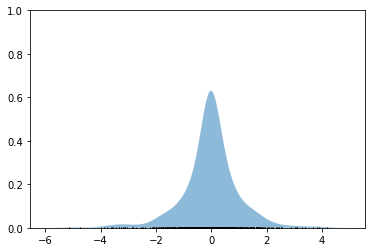

In [32]:
#Constructing marginal distributions: Infer

d = Infer({'method': 'forward', 'samples': 1000}, lambda: gaussian(0, 1)*gaussian(0, 1))
print(d.sample())
d.viz()

In [33]:
#The rules of probability

#Product Rule

A = flip()
B = flip()
C = [A, B]
print(C)

A = flip()
B = flip((0.3 if A else 0.7))
print([A, B])

[False, False]
[False, True]


In [34]:
#Sum Rule

print(flip() | flip())

True


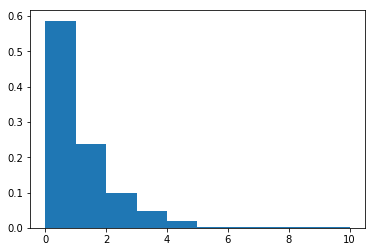

In [35]:
#Stochastic recursion

def geometric(p):
    return 0 if flip(p) else 1 + geometric(p)

g = Infer({'method': 'forward', 'samples': 1000}, lambda: geometric(0.6))

g.viz()

In [36]:
#Persistent Randomness: mem

def eyeColor(person):
    return uniformDraw(['blue', 'green', 'brown'])

print(flip() == flip())

memFlip = mem(flip)
print(memFlip() == memFlip())

memEyeColor = mem(eyeColor)

print([memEyeColor('bob'), memEyeColor('alice'), memEyeColor('bob')])

@mem
def flipAlot(n):
    return flip()

[[flipAlot(1), flipAlot(12), flipAlot(47), flipAlot(1548)],
    [flipAlot(1), flipAlot(12), flipAlot(47), flipAlot(1548)]]

False
True
['blue', 'brown', 'blue']


[[False, True, False, False], [False, True, False, False]]

In [37]:
#Example: Intuitive physics
#TODO